In [3]:
import pandas as pd

tp='/content/train-perceptron.txt'
df= pd.read_csv(tp, sep=" ", header=None, names=['A', 'B', 'class'], dtype='Float64')
df

,A,B,class
0,1.0,1.0,1.0
1,1.0,-1.0,1.0
2,2.0,2.5,2.0
3,0.0,2.0,2.0
4,2.0,3.0,2.0
5,4.0,5.0,1.0


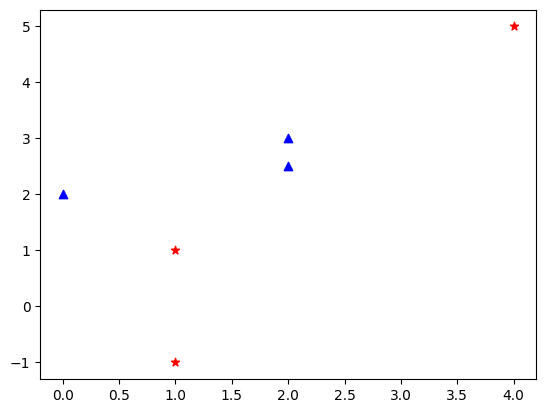

In [4]:
import matplotlib.pyplot as plt

c1=df[df.iloc[:,2]==1]
c2=df[df.iloc[:,2]==2]

plt.scatter(c1.iloc[:,0],c1.iloc[:,1],color='red', marker='*')
plt.scatter(c2.iloc[:,0],c2.iloc[:,1],color='blue', marker='^')

In [5]:
import numpy as np

def hD_gen(data):
    x1 = data['A']
    x2 = data['B']
    x1_sq = x1 ** 2
    x2_sq = x2 ** 2
    x1_x2 = x1 * x2
    ones = np.ones_like(x1, dtype=float)
    hd_points = np.column_stack((x1_sq, x2_sq, x1_x2, x1, x2, ones, data['class']))
    return hd_points

c1_data=hD_gen(c1)
c2_data=hD_gen(c2)

c2_data[:, :-1] *= -1

fData= np.vstack((c1_data, c2_data))
print(fData)

[[1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 -1.0 1.0 -1.0 1.0 1.0]
 [16.0 25.0 20.0 4.0 5.0 1.0 1.0]
 [-4.0 -6.25 -5.0 -2.0 -2.5 -1.0 2.0]
 [-0.0 -4.0 -0.0 -0.0 -2.0 -1.0 2.0]
 [-4.0 -9.0 -6.0 -2.0 -3.0 -1.0 2.0]]


0.1
w0:  [ 1.    -1.025  0.7    0.2   -0.75   0.1  ]
o000000000 99

 0.1
wm0: [ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]
mmmmmmmmmmm 101
0.2
w0:  [10.  -6.7  4.4 -1.2 -9.4  3.2]
o000000000 92

 0.2
wm0: [ 13.    -8.85   5.6   -1.   -10.9    2.4 ]
mmmmmmmmmmm 128
0.30000000000000004
w0:  [ 16.3 -10.7   6.7  -2.3 -15.2   5.5]
o000000000 99

 0.30000000000000004
wm0: [ 18.    -11.625   7.5    -1.2   -15.45    3.   ]
mmmmmmmmmmm 105
0.4
w0:  [ 22.2 -14.3   9.8  -2.6 -20.4   7.4]
o000000000 114

 0.4
wm0: [ 26.  -17.7  11.2  -2.  -21.8   4.8]
mmmmmmmmmmm 117
0.5
w0:  [ 25.   -16.75  11.    -3.   -23.5    8.  ]
o000000000 102

 0.5
wm0: [ 30.    -19.375  12.5    -2.    -25.75    5.   ]
mmmmmmmmmmm 101
0.6
w0:  [ 29.2 -18.5  12.4  -4.4 -27.8   9.4]
o000000000 114

 0.6
wm0: [ 39.   -26.55  16.8   -3.   -32.7    7.2 ]
mmmmmmmmmmm 117
0.7000000000000001
w0:  [ 38.8   -25.075  17.1    -4.6   -35.75   12.9  ]
o000000000 109

 0.7000000000000001
wm0: [ 45.5   -30.975  19.6    -3.5   -38.15    8.4

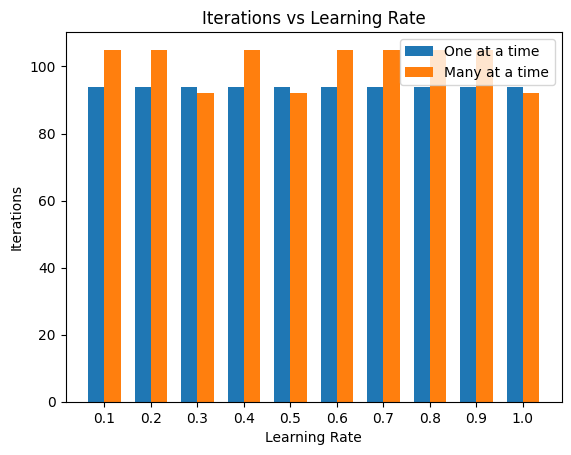

In [28]:
np.random.seed(50)


def oneAtTime(X,y,lRate,w):
  mis= True
  itr=0

  while mis:
    mis= False
    for i in range(len(X)):
      if np.dot(X[i],w) <= 0:
        w += lRate*X[i].astype(float)
        mis=True
        #print("miss", w0)
    itr+=1
    #print("it", itr)
  return w, itr


def ManyAtTime(X,y,lRate,w):
  mis= True
  itr=0;

  while mis:
    mis=False
    err= np.where(np.dot(X,w) <=0)[0]
    if len(err) >0:
      w+= lRate * np.sum(X[err],axis=0).astype(float)
      mis=True
    itr += 1

  return w, itr


X= fData[:, :-1]
y= fData[:, -1]

learningRate= np.arange(0.1, 1.1, 0.1)

oneAtTime_iterations = []
ManyAtTime_iterations = []

for lr in learningRate:
  print(lr)

  w0= np.zeros(X.shape[1], dtype=float)
  w1= np.ones(X.shape[1], dtype=float)
  wr=np.random.randn(X.shape[1])

  wo0, itrr0 = oneAtTime(X,y,lr,w0)
  wo1,itrr1 = oneAtTime(X,y,lr,w1)
  woe,itrrr = oneAtTime(X,y,lr,wr)
  oneAtTime_iterations.append((itrr0, itrr1, itrrr))
  print("w0: ", wo1)
  print("o000000000",itrrr)

  w0= np.zeros(X.shape[1], dtype=float)
  w1= np.ones(X.shape[1], dtype=float)
  wr=np.random.randn(X.shape[1])
  print('\n',lr)
  wm0, itrm0 = ManyAtTime(X,y,lr,w0)
  wm1, itrm1 = ManyAtTime(X,y,lr,w1)
  wmr, itrmr = ManyAtTime(X,y,lr,wr)
  ManyAtTime_iterations.append((itrm0, itrm1, itrmr))
  print("wm0:", wm0)
  print("mmmmmmmmmmm",itrmr)

learningRate_rounded = np.round(learningRate, 1)
bar_width = 0.35
index = np.arange(len(learningRate))

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, [x[0] for x in oneAtTime_iterations], bar_width, label='One at a time')
bar2 = ax.bar(index + bar_width/2, [x[0] for x in ManyAtTime_iterations], bar_width, label='Many at a time')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Iterations')
ax.set_title('Iterations vs Learning Rate')
ax.set_xticks(index)
ax.set_xticklabels([str(lr) for lr in learningRate_rounded])
ax.legend()

plt.show()